# <center>Introduction to Machine Learning</center> #  
## <center>Lab Assignment 3: Classification with Dimensionality Reduction and Ensemble Learning</center> ##  
#### <center>Yizhuo Li</center> ####  
#### <center>2019/03/02</center> ####

***1. Image Classification with Dimensionality Reduction [50 points]:***   
You will evaluate how using the unsupervised learning tool, PCA, to reduce the feature set size impacts the performance of two classification algorithms on two different datasets.  

(a) Prepare two image classification datasets for this study: (Code)  
i. Load two datasets: MNIST (number recognition), LFW (face recognition). ii. Split each dataset into a 65/35 train/test split.  

(b) For each dataset, train and evaluate two classification algorithms (e.g., SVM, Naive Bayes, Decision Tree, KNN) with at least 20 different feature dimension sizes. To achieve the different feature dimension sizes, you will need to vary the number of principal components you keep using the unsupervised dimensionality reduction algorithm PCA. Use accuracy as your evaluation metric. (Code)  

(c) Report the predictive performance of each classifier on each dataset as a func- tion of the feature dimension size (i.e., number of principal components). As a result, your write-up should include one plot show results for both classification algorithms on both datasets. (Write-up)  

(d) Write a discussion analyzing the influence of applying PCA on the classification performance. For example, what feature dimension sizes were better/worse and why do you think so? What can you infer by observing the classification perfor- mance across the different datasets and different classification algorithms? Your discussion should consist of two to four paragraphs. (Write-up)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Source: To be added
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

In [2]:
from sklearn.model_selection import train_test_split

X_f = faces.data
y_f = faces.target
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_f, y_f, test_size=0.35)

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(Xm_train, ym_train),(Xm_test, ym_test) = mnist.load_data()
Xm_train, Xm_test = Xm_train / 255.0, Xm_test / 255.0

Xm_train = Xm_train.reshape((60000,28*28))
Xm_test = Xm_test.reshape((10000,28*28))

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

def diffDimension_f(n=1):
    
    NBaccuracy = []
    TreeAccuracy = []
    dimension_setting = range(1,n)
    for dimension in dimension_setting:
        pca = PCA(n_components = dimension)
        pca.fit(Xf_train)
        Xf_train_reduced = pca.transform(Xf_train)
        Xf_test_reduced = pca.transform(Xf_test)

        NB_model = GaussianNB()
        NB_model.fit(Xf_train_reduced, yf_train)
        NB_f_accuracy = NB_model.score(Xf_test_reduced, yf_test)
        NBaccuracy.append(NB_f_accuracy)

        Tree_model = DecisionTreeClassifier()
        Tree_model.fit(Xf_train_reduced, yf_train)
        Tree_f_accuracy = Tree_model.score(Xf_test_reduced, yf_test)
        TreeAccuracy.append(Tree_f_accuracy)
    
    plt.plot(dimension_setting, NBaccuracy, label= 'NB accuracy')
    plt.plot(dimension_setting, TreeAccuracy, label= 'Tree accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('number of dimension')
    plt.legend()
    
    
#     print('when dimension is ', dimension, ', the accuracy of GaussianNB is ', NB_f_accuracy)
#     print('when dimension is ', dimension, ', the accuracy of DecisionTree is ', Tree_f_accuracy)

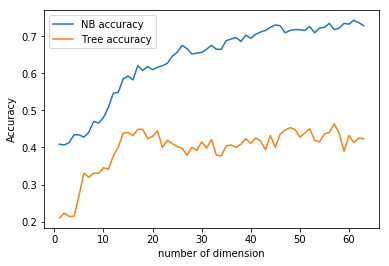

In [5]:
diffDimension_f(64)

In [6]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def diffDimension_m(n=1):
    
    SVMaccuracy = []
    KNNaccuracy = []
    dimension_setting = range(1,n)
    for dimension in dimension_setting:
        pca = PCA(n_components = dimension)
        pca.fit(Xm_train)
        Xm_train_reduced = pca.transform(Xm_train)
        Xm_test_reduced = pca.transform(Xm_test)

        SVM_model = SVC()
        SVM_model.fit(Xm_train_reduced, ym_train)
        SVM_m_accuracy = SVM_model.score(Xm_test_reduced, ym_test)
        SVMaccuracy.append(SVM_m_accuracy)

        KNN_model = KNeighborsClassifier()
        KNN_model.fit(Xm_train_reduced, ym_train)
        KNN_m_accuracy = KNN_model.score(Xm_test_reduced, ym_test)
        KNNaccuracy.append(KNN_m_accuracy)
    
    plt.plot(dimension_setting, SVMaccuracy, label= 'SVM accuracy')
    plt.plot(dimension_setting, KNNaccuracy, label= 'KNN accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('number of dimension')
    plt.legend()

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.6/site-p

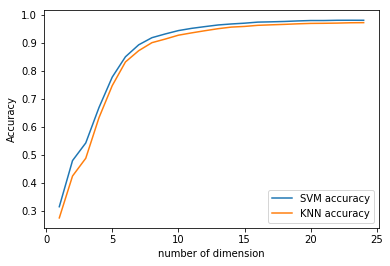

In [7]:
diffDimension_m(25)

As shown above, I use the Naive Bayes and Decision tree to predict the face dataset. And as the plot shown, with the increase of the dimension, the accuracy of the predictions are also increase.

Since the PCA is used to reduce the feature of the datasets, so, it's easy to image that the less dimension we have, the lower accuracy we will get. And what we image is the same with the accuracy we calculated.

For the face dataset, when the dimension is bigger than 35, both algorithms' performance are already stabilized. Which means that even though we maintain more features, the accuracy of the model will not be improved.So, for the first dataset, the component of the PCA is 35 will be good enough. Less feature we have, the less time we need to train the model.

As for the second dataset, when the dimension of feature is bigger than 10, the accuracy is stable. So, the PCA's component can be 10 and it will be good enough for our prediction sometimes.

So, my guess is we don't need to contain every feature of the dataset to train our model, that will not be helpful for our predicting model. So, for the larage datasets, we could always try to use the PCA to reduce the features.

**2. Ensemble Learning [50 points]:**  
You will analyze the effects of using different types of ensembles for the classification task.  

(a) Load two text-based classification datasets (e.g., from NLTK or Kaggle) and pre- process as necessary to arrive at a numerical representation of the text. (Code)  

(b) For each dataset, evaluate these classifiers using 5-fold cross validation: (Code)  

i. Three different classifiers (e.g., SVM, Naive Bayes, Decision Tree, KNN).  
ii. Majority vote classifier that uses the three classifiers from previous step.  
iii. Bagging method.   
iv. Boosting method.  

(c) Report in a table the mean accuracy of each classifier you evaluated in the previous step for each dataset. Consequently, your report should include two tables that each show six accuracy scores for the six methods. (Write-up)  

(d) Write a discussion about the performance of the different ensemble methods. For example, what classification approaches did better/worse and why do you think so? How did ensemble methods compare to non-ensemble methods? What can you infer by observing the classification performance across the different datasets? Your discussion should consist of two to four paragraphs. (Write-up)

In [29]:
# import kaggle
# !kaggle datasets list

In [1]:
import string
from itertools import chain

from nltk.corpus import movie_reviews as mr
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk

stop = stopwords.words('english')
documents = [([w for w in mr.words(i) if w.lower() not in stop and w.lower() not in string.punctuation], i.split('/')[0]) for i in mr.fileids()]

word_features = FreqDist(chain(*[i for i,j in documents]))
word_features = list(word_features.keys())[:100]

numtrain = int(len(documents) * 90 / 100)
train_set = [({i:(i in tokens) for i in word_features}, tag) for tokens,tag in documents[:numtrain]]
test_set = [({i:(i in tokens) for i in word_features}, tag) for tokens,tag in documents[numtrain:]]

In [83]:
x = 'neg/cv986_15092.txt'
if x.startswith('neg'):
    print("laal")

laal


In [84]:
positiveFiles = [x for x in mr.fileids() if x.startswith("pos")]
negativeFiles = [x for x in mr.fileids() if x.startswith("neg")]

In [ ]:
# don't know how to open a specific file in nltk
positiveReviews, negativeReviews, testReviews = [], [], []
for pfile in positiveFiles:
    with open(path+"train/pos/"+pfile, encoding="latin1") as f:
        positiveReviews.append(f.read())
for nfile in negativeFiles:
    with open(path+"train/neg/"+nfile, encoding="latin1") as f:
        negativeReviews.append(f.read())
for tfile in testFiles:
    with open(path+"test/"+tfile, encoding="latin1") as f:
        testReviews.append(f.read())

In [36]:
import pandas as pd
import numpy as np
import re
import os
from IPython.display import HTML

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
from sklearn.decomposition import PCA

from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import optimizers

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import words
from nltk.corpus import wordnet 
allEnglishWords = words.words() + [w for w in wordnet.words()]
allEnglishWords = np.unique([x.lower() for x in allEnglishWords])

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [40]:
path = "/Users/yizhuoli/Downloads/ML/Lab/aclImdb/"
positiveFiles = [x for x in os.listdir(path+"train/pos/") if x.endswith(".txt")]
negativeFiles = [x for x in os.listdir(path+"train/neg/") if x.endswith(".txt")]
testFiles = [x for x in os.listdir(path+"test/") if x.endswith(".txt")]

In [41]:
positiveReviews, negativeReviews, testReviews = [], [], []
for pfile in positiveFiles:
    with open(path+"train/pos/"+pfile, encoding="latin1") as f:
        positiveReviews.append(f.read())
for nfile in negativeFiles:
    with open(path+"train/neg/"+nfile, encoding="latin1") as f:
        negativeReviews.append(f.read())
for tfile in testFiles:
    with open(path+"test/"+tfile, encoding="latin1") as f:
        testReviews.append(f.read())

In [42]:
reviews = pd.concat([
    pd.DataFrame({"review":positiveReviews, "label":1, "file":positiveFiles}),
    pd.DataFrame({"review":negativeReviews, "label":0, "file":negativeFiles}),
    pd.DataFrame({"review":testReviews, "label":-1, "file":testFiles})
], ignore_index=True).sample(frac=1, random_state=1)
reviews.head()

,review,label,file
21939,"""National Lampoon Goes to the Movies"" is the w...",0,7277_1.txt
24113,I can't believe that so much talent can be was...,0,1073_2.txt
4633,This is a wonderful film. The non-stop patter ...,1,10574_10.txt
17240,"Did anyone who was making this movie, particul...",0,1085_2.txt
4894,While a bit preachy on the topic of progress a...,1,8127_8.txt


In [43]:
reviews = reviews[["review", "label", "file"]].sample(frac=1, random_state=1)
train = reviews[reviews.label!=-1].sample(frac=0.6, random_state=1)
valid = reviews[reviews.label!=-1].drop(train.index)
test = reviews[reviews.label==-1]

In [44]:
print(train.shape)
print(valid.shape)
print(test.shape)

(15000, 3)
(10000, 3)
(2, 3)


In [46]:
class Preprocessor(object):
    ''' Preprocess data for NLP tasks. '''

    def __init__(self, alpha=True, lower=True, stemmer=True, english=False):
        self.alpha = alpha
        self.lower = lower
        self.stemmer = stemmer
        self.english = english
        
        self.uniqueWords = None
        self.uniqueStems = None
        
    def fit(self, texts):
        texts = self._doAlways(texts)

        allwords = pd.DataFrame({"word": np.concatenate(texts.apply(lambda x: x.split()).values)})
        self.uniqueWords = allwords.groupby(["word"]).size().rename("count").reset_index()
        self.uniqueWords = self.uniqueWords[self.uniqueWords["count"]>1]
        if self.stemmer:
            self.uniqueWords["stem"] = self.uniqueWords.word.apply(lambda x: PorterStemmer().stem(x)).values
            self.uniqueWords.sort_values(["stem", "count"], inplace=True, ascending=False)
            self.uniqueStems = self.uniqueWords.groupby("stem").first()
        
        #if self.english: self.words["english"] = np.in1d(self.words["mode"], allEnglishWords)
        print("Fitted.")
            
    def transform(self, texts):
        texts = self._doAlways(texts)
        if self.stemmer:
            allwords = np.concatenate(texts.apply(lambda x: x.split()).values)
            uniqueWords = pd.DataFrame(index=np.unique(allwords))
            uniqueWords["stem"] = pd.Series(uniqueWords.index).apply(lambda x: PorterStemmer().stem(x)).values
            uniqueWords["mode"] = uniqueWords.stem.apply(lambda x: self.uniqueStems.loc[x, "word"] if x in self.uniqueStems.index else "")
            texts = texts.apply(lambda x: " ".join([uniqueWords.loc[y, "mode"] for y in x.split()]))
        #if self.english: texts = self.words.apply(lambda x: " ".join([y for y in x.split() if self.words.loc[y,"english"]]))
        print("Transformed.")
        return(texts)

    def fit_transform(self, texts):
        texts = self._doAlways(texts)
        self.fit(texts)
        texts = self.transform(texts)
        return(texts)
    
    def _doAlways(self, texts):
        # Remove parts between <>'s
        texts = texts.apply(lambda x: re.sub('<.*?>', ' ', x))
        # Keep letters and digits only.
        if self.alpha: texts = texts.apply(lambda x: re.sub('[^a-zA-Z0-9 ]+', ' ', x))
        # Set everything to lower case
        if self.lower: texts = texts.apply(lambda x: x.lower())
        return texts  

In [47]:
train.head()

,review,label,file
6011,This documentary explores a story covered in P...,1,1251_9.txt
9653,"Released two years before I was born, this Osc...",1,11396_10.txt
15040,THE ZOMBIE CHRONICLES <br /><br />Aspect ratio...,0,94_1.txt
6029,it's amazing that so many people that i know h...,1,8654_9.txt
9729,This final entry in George Lucas's STAR WARS m...,1,820_10.txt


In [48]:
preprocess = Preprocessor(alpha=True, lower=True, stemmer=True)

In [49]:
%%time
trainX = preprocess.fit_transform(train.review)

Fitted.
Transformed.
Transformed.
CPU times: user 50.8 s, sys: 1.77 s, total: 52.6 s
Wall time: 50.4 s


In [121]:
from sklearn.model_selection import train_test_split

X = trainX
y = train.label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [138]:
# Bag-of-words model
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()

docs = np.array(X)
docs_train = np.array(X_train)
docs_test = np.array(X_test)

# Create vocabulary
bag = count.fit_transform(docs)
# print(count.vocabulary_)

In [123]:
print(bag.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [124]:
# TF-IDF model
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True,
                       norm = 'l2',
                        smooth_idf=True)
result = tfidf.fit_transform(count.fit_transform(docs))
np.set_printoptions(precision=2)
print(result.toarray())

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.04 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [125]:
result_train.shape[0]

11250

In [106]:
result_test = tfidf.fit_transform(count.fit_transform(docs_test))
result_train = tfidf.fit_transform(count.fit_transform(docs_train))

In [126]:
# Majority Vote Ensemble algorithm
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

classKNN = KNeighborsClassifier()
classSVM = LinearSVC()
classTree = DecisionTreeClassifier()

In [129]:
eclf = VotingClassifier(estimators=[('knn', classKNN), ('svn', classSVM), ('tree', classTree)], voting='hard')

scores = cross_val_score(eclf, result, y, cv=5)
scores.mean()

0.8503999999999999

In [130]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(classSVM)
scores = cross_val_score(bagging, result, y, cv=5)
scores.mean()

0.8797333333333333

In [131]:
# Adaboost algorithm
from sklearn.ensemble import AdaBoostClassifier

adabooster = AdaBoostClassifier(n_estimators = 50)
scores = cross_val_score(adabooster, result, y, cv=5)
scores.mean()

0.8035333333333334

In [133]:
print(result_train.shape[0])
print(result_test.shape[0])
print(len(y_test))
print(len(y_train))

11250
3750
3750
11250


In [136]:
classKNN.fit(result_train, y_train)
KNNAccuracy = classKNN.score(result_test, y_test)
classSVM.fit(result_train, y_train)
SVMAccuracy = classSVM.score(result_test, y_test)
classTree.fit(result_train, y_train)
TreeAccuracy = classTree.score(result_test, y_test)

print(KNNAccuracy)
print(SVMAccuracy)
print(TreeAccuracy)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 19178 while Y.shape[1] == 24638

Sorry that I don't know why I can't train this three models. Because I think the length of them are same. So, I can't get the score of these three.

**The socer of the 5-fold cross validation, Bagging and Boosting is show above clearly.** Since I just have these three result, I will not make a table.

**I try to figure the NLTK dataset but I field.** I don't know how to access the specific field in NLTK dataset. I will find an office hour to talk with you or the TA of the class. It seems there is no TA for this class?

So, I can just show the three result above.

For me I just got the answer of one dataset and didn't get the result of the single model. So, the best model is Bagging Classifier. Bagging is train algorithm repeatedly on different random subsets of the training set. **So, what I can't understand is why we use the whole dataset to finish the ensemble? Why not use the training dataset?** Since the algorithorms should be finish on training dataset.

I try to use the same type kind of dataset which are both movie reviews from the kaggle and the NLTK and compare their difference. But this plan doesn't work.

For me I gusee the ensemble methords should be better than the single model, although I didn't get the single model result. However, form the statistical aspect, it should be like this.

I am not sure why the Bagging methord has the best performance here, so, I will just say this methord fit for this dataset.